## BARREL PySPEADAS Basic Usage Guide

This notebook will demonstrate how to download and view BARREL data using pySPEDAS. 

### Setup

The following line installs pyspedas, so this notebook can be used in Google Colab.  If you're running in an environment where pyspedas is already installed, you can comment out or skip this command.

In [ ]:
!pip install pyspedas

First, import the pyspedas library and some tplot functions.

In [1]:
import pyspedas
from pytplot import tplot, tplot_names, tlimit, tplot_options, options, store_data

### Loading Data
We will load data the data collected by BARREL flight `1D` from `January 17th and 18th, 2013`. To do this, use the pySPEDAS BARREL data loader to download the data from CDAWeb.

Each type of BARREL data uses a different data loader function. The options are:
- `sspc` - Slow Specta (256 channels accumulated over 32 seconds)
- `mspc` - Medium Spectra (48 channels accumulated over 4 seconds)
- `fspc` - Fast Spectra (4 channels record at 20Hz)
- `magn` - Magnetometer Data
- `ephm` - Ephemeris (GPS data and magnetic coordinates)
- `hkpg` - Housekeeping (Voltages, currents, temperatures)
- `rcnt` - Rate Counters (Scintillating statistics)

For this example we will download the Fast Spectra data using it's loader function:

In [2]:
#Specify the data range. The end date is non-inclusive, so this will only download for the 17th and 18th.
trange=['2013-01-17', '2013-01-19']

pyspedas.barrel.fspc( #use the loader for a specific data type
    trange=trange,
    probe='1D' #specify the payload ID
)

19-Nov-24 03:46:01: File is current: barrel_data/l2/1d/fspc/bar_1d_l2_fspc_20130117_v10.cdf
19-Nov-24 03:46:01: File is current: barrel_data/l2/1d/fspc/bar_1d_l2_fspc_20130118_v10.cdf


['brl1D_Quality', 'brl1D_FSPC1', 'brl1D_FSPC2', 'brl1D_FSPC3', 'brl1D_FSPC4']

The data files `bar_1d_l2_fspc_20130117_v10.cdf` and `bar_1d_l2_fspc_20130118_v10.cdf` should have been downloaded to a sub folder called `./barrel_data`. Once those files have been downloaded, local files will be reused each time the loader is run.

To see what data have been loaded, use the `tplot_names` function to list what is available.

In [3]:
tplot_names()

0 : brl1D_Quality
1 : brl1D_FSPC1
2 : brl1D_FSPC2
3 : brl1D_FSPC3
4 : brl1D_FSPC4


['brl1D_Quality', 'brl1D_FSPC1', 'brl1D_FSPC2', 'brl1D_FSPC3', 'brl1D_FSPC4']

Loading data from another flight adds more tplot variables

In [4]:
pyspedas.barrel.fspc( #use the loader for a specific data type
    trange=trange, #specify the time range
    probe='1G' #specify the payload ID
)
tplot_names()

19-Nov-24 03:46:08: File is current: barrel_data/l2/1g/fspc/bar_1g_l2_fspc_20130117_v10.cdf
19-Nov-24 03:46:08: File is current: barrel_data/l2/1g/fspc/bar_1g_l2_fspc_20130118_v10.cdf


0 : brl1D_Quality
1 : brl1D_FSPC1
2 : brl1D_FSPC2
3 : brl1D_FSPC3
4 : brl1D_FSPC4
5 : brl1G_Quality
6 : brl1G_FSPC1
7 : brl1G_FSPC2
8 : brl1G_FSPC3
9 : brl1G_FSPC4


['brl1D_Quality',
 'brl1D_FSPC1',
 'brl1D_FSPC2',
 'brl1D_FSPC3',
 'brl1D_FSPC4',
 'brl1G_Quality',
 'brl1G_FSPC1',
 'brl1G_FSPC2',
 'brl1G_FSPC3',
 'brl1G_FSPC4']

## Plot the data

Data can be plotted by passing the name of a tplot variable to the `tplot` function.

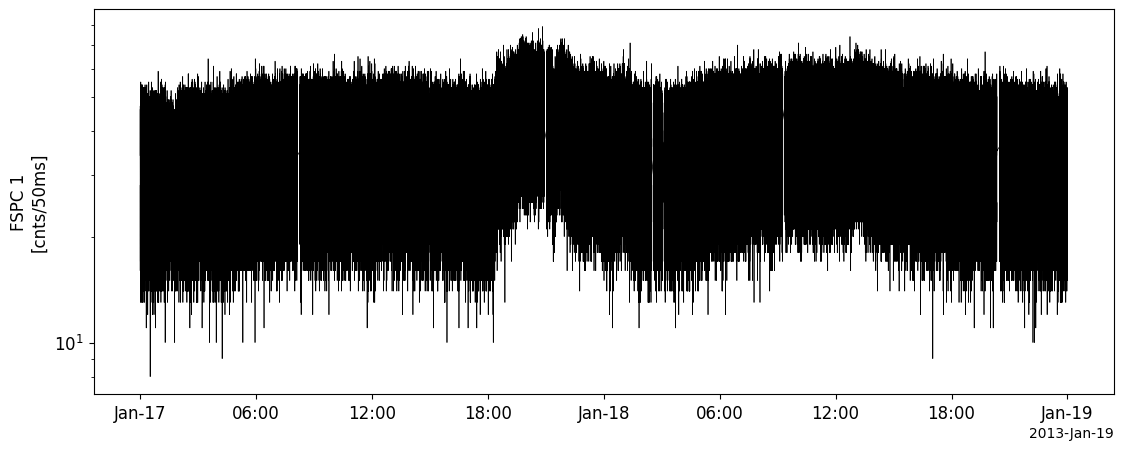

In [5]:
tplot('brl1D_FSPC1')

Passing a list of tplot names will create stacked plots

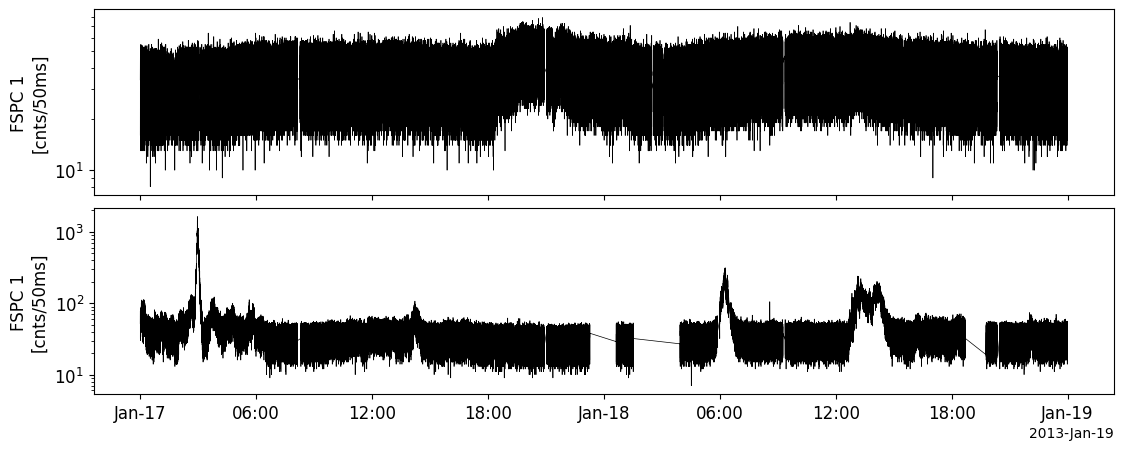

In [6]:
tplot(['brl1D_FSPC1', 'brl1G_FSPC1'])

## Adjust the plots

By default, the entire range of available data is plotted. We can zoom in to a take a closer look using the `tlimit` function.

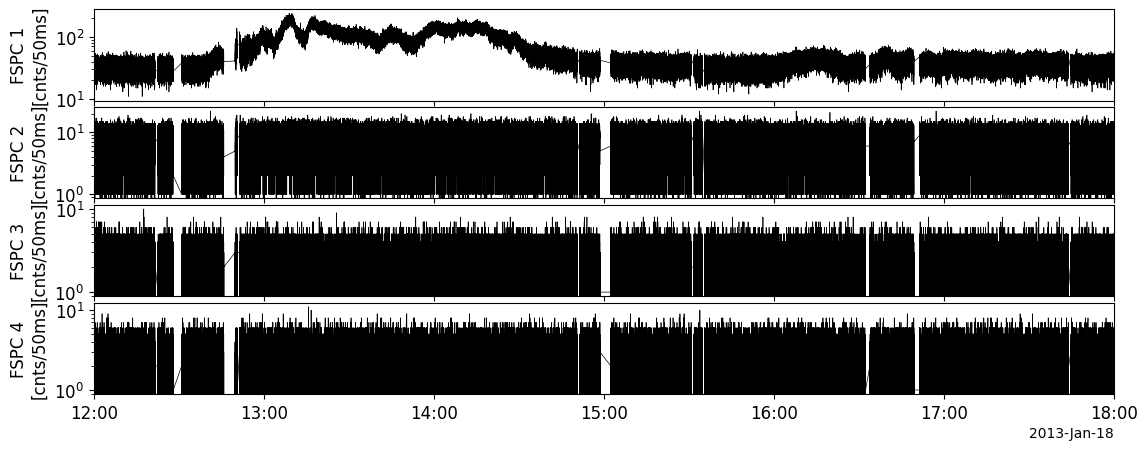

In [7]:
tlimit(['2013-01-18/12:00', '2013-01-18/18:00'])
tplot(['brl1G_FSPC1', 'brl1G_FSPC2', 'brl1G_FSPC3', 'brl1G_FSPC4'])

Next, we can add colors, titles, labels, etc using the `ptplot.options` and `pytplot.tplot_options` functions. A full list of options are availible here:
- [pytplot.tplot_options](https://pytplot.readthedocs.io/en/latest/tplot_options.html)
- [pytplot.options](https://pytplot.readthedocs.io/en/latest/options.html)

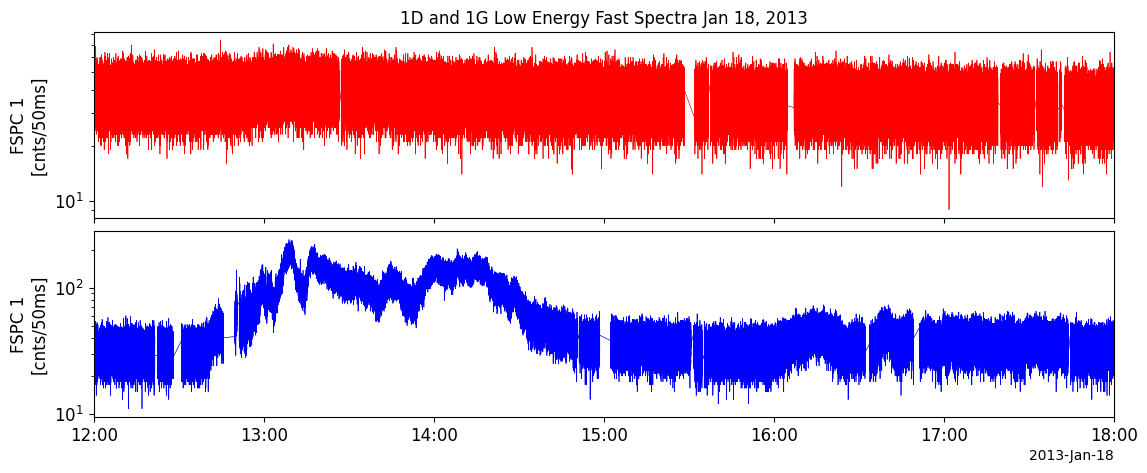

In [8]:
tplot_options("title", "1D and 1G Low Energy Fast Spectra Jan 18, 2013")
options("brl1D_FSPC1", "Color", "red")
options("brl1G_FSPC1", "Color", "blue")
tplot(["brl1D_FSPC1", "brl1G_FSPC1"])

NOTE: Options that are set will stay set for future plots. So remember to change plot titles when you change variables.

## Creating Psedovariables

Using the `pytplot.store_data` function, we can group of variables together. This is useful if we want to group more than one variable togethr in a single plot.

19-Nov-24 03:46:25: File is current: barrel_data/l2/1d/magn/bar_1d_l2_magn_20130117_v10.cdf
19-Nov-24 03:46:25: File is current: barrel_data/l2/1d/magn/bar_1d_l2_magn_20130118_v10.cdf


0 : brl1D_Quality
1 : brl1D_FSPC1
2 : brl1D_FSPC2
3 : brl1D_FSPC3
4 : brl1D_FSPC4
5 : brl1G_Quality
6 : brl1G_FSPC1
7 : brl1G_FSPC2
8 : brl1G_FSPC3
9 : brl1G_FSPC4
10 : brl1D_MAG_X_uncalibrated
11 : brl1D_MAG_Y_uncalibrated
12 : brl1D_MAG_Z_uncalibrated
13 : brl1D_Total


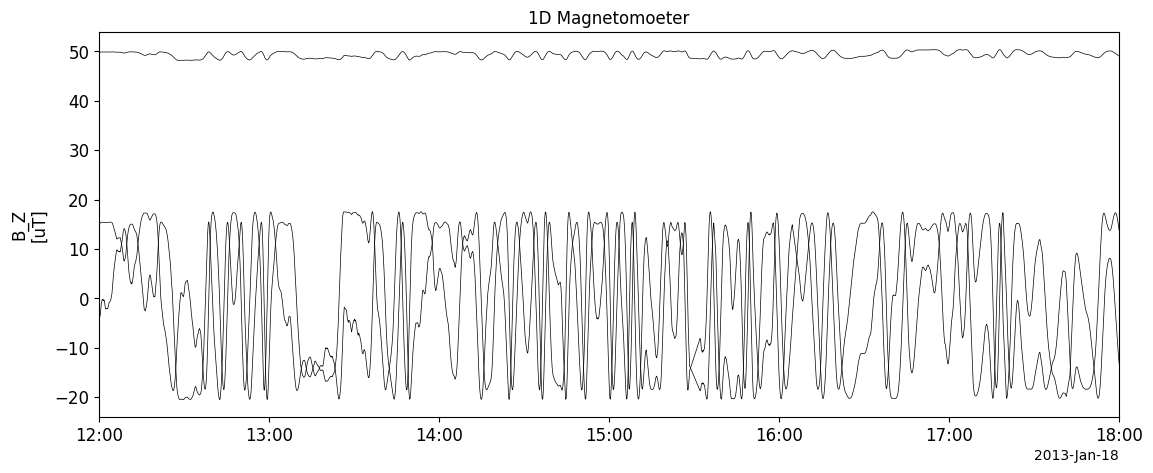

In [9]:
pyspedas.barrel.magn(probe="1d", trange=trange)
tplot_names()
store_data("brl1D_MAG_XYZ", data=['brl1D_MAG_X_uncalibrated', 'brl1D_MAG_Y_uncalibrated', 'brl1D_MAG_Z_uncalibrated'])
tplot_options("title", "1D Magnetomoeter")
tplot("brl1D_MAG_XYZ")